## 1. LOAD TRAINING DATA

In [197]:
import pandas as pd
import numpy as np
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [198]:
# # load dataset for training

# df1 = pd.read_csv("bq-results-20240116-153937-1705419608751.csv")
# df2 = pd.read_csv("bq-results-20240116-153937-1705419608751.csv")

In [199]:
df2.date_in.str[5:7].value_counts()

date_in
12    255665
09    255064
10    254998
11    254338
08    253611
07    249694
06    242990
05    216887
04    210386
03    205158
02    196916
01    191449
Name: count, dtype: int64

In [201]:
# cols2use = ['occupancy_rate', 'adr_usd', 'n_rooms', 'n_bookings', 'property_subtype', 'date_in']
# df = pd.concat([df1[cols2use], df2[cols2use]]).reset_index(drop=True)
# df.to_pickle('AIRBNB_PICKLE.pkl')
# df_0 = df.loc[ (df['adr_usd']>1) & (df['occupancy_rate']>0) & (df['occupancy_rate']<1) & (df.date_in.str[4:8].isin(  ['-07-', '-08-'])) ]

# df_0['adr_room'] = df_0['adr_usd'] / df_0['n_rooms'] 
# df_0 = df_0.loc[ (df_0['adr_room'] <= 400)] # outliers en precio

# df_0[['occupancy_rate_log', 'adr_usd_log', 'adr_room_log', 'n_rooms_log', 'n_bookings_log']] = np.log1p(df_0[['occupancy_rate', 
#                                                 'adr_usd', 'adr_room', 'n_rooms', 'n_bookings']])

# cols_log = ['occupancy_rate_log', 'adr_usd_log', 'adr_room_log', 'n_rooms_log', 'n_bookings_log', 'property_subtype']
# cols= ['occupancy_rate', 'adr_usd', 'adr_room', 'n_rooms', 'n_bookings', 'property_subtype']


In [202]:
# df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455128 entries, 471 to 5574311
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   occupancy_rate      455128 non-null  float64
 1   adr_usd             455128 non-null  float64
 2   n_rooms             455128 non-null  float64
 3   n_bookings          455128 non-null  int64  
 4   property_subtype    455128 non-null  object 
 5   date_in             455128 non-null  object 
 6   adr_room            455128 non-null  float64
 7   occupancy_rate_log  455128 non-null  float64
 8   adr_usd_log         455128 non-null  float64
 9   adr_room_log        455128 non-null  float64
 10  n_rooms_log         455128 non-null  float64
 11  n_bookings_log      455128 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 45.1+ MB


In [203]:
# df_0['property_subtype'].value_counts()


property_subtype
flat                237886
special_house        91116
detached_house       72404
flat_house_room      40856
unknown               6530
loft                  4466
hospitality_room      1724
studio                 146
Name: count, dtype: int64

In [204]:
# # AGRUPANDO en moodo histograma de adr_room
# df_0["labels"] = pd.cut(df_0["adr_room"], bins=1000, labels=False)
# df_g = df_0.groupby(by=["property_subtype", "labels"]).agg({"adr_room":"mean", "occupancy_rate":["mean", "count"],
#                                                            "adr_room_log":"mean", "occupancy_rate_log":"mean"}).reset_index()
# df_g.columns = ["property_subtype", "labels", "Mean ADR room", "Mean Occupancy Rate", "Observations per Bin", 
#                "Mean ADR room log", "Mean Occupancy Rate log"]

In [206]:
# # AGRUPANDO con tamalo de bin constante en adr_room

# df_0 = df_0.sort_values(by=["adr_room"]).reset_index(drop=True)
# df_0['label1k'] = df_0.index//500

# df_g2 = df_0.groupby(by=["property_subtype", "label1k"]).agg({"adr_room":"mean", "occupancy_rate":["mean", "count"],
#                                                            "adr_room_log":"mean", "occupancy_rate_log":"mean"}).reset_index()
# df_g2.columns = ["property_subtype", "label1k", "Mean ADR room", "Mean Occupancy Rate", "Observations per Bin", 
#                "Mean ADR room log", "Mean Occupancy Rate log"]

In [215]:
# df_g2.to_excel("df_g2.xlsx", index=False)

In [ ]:
df_g2 = pd.read_excel("df_g2.xlsx")


## 2. EXPLORATORY

### 2.1. Escala natural

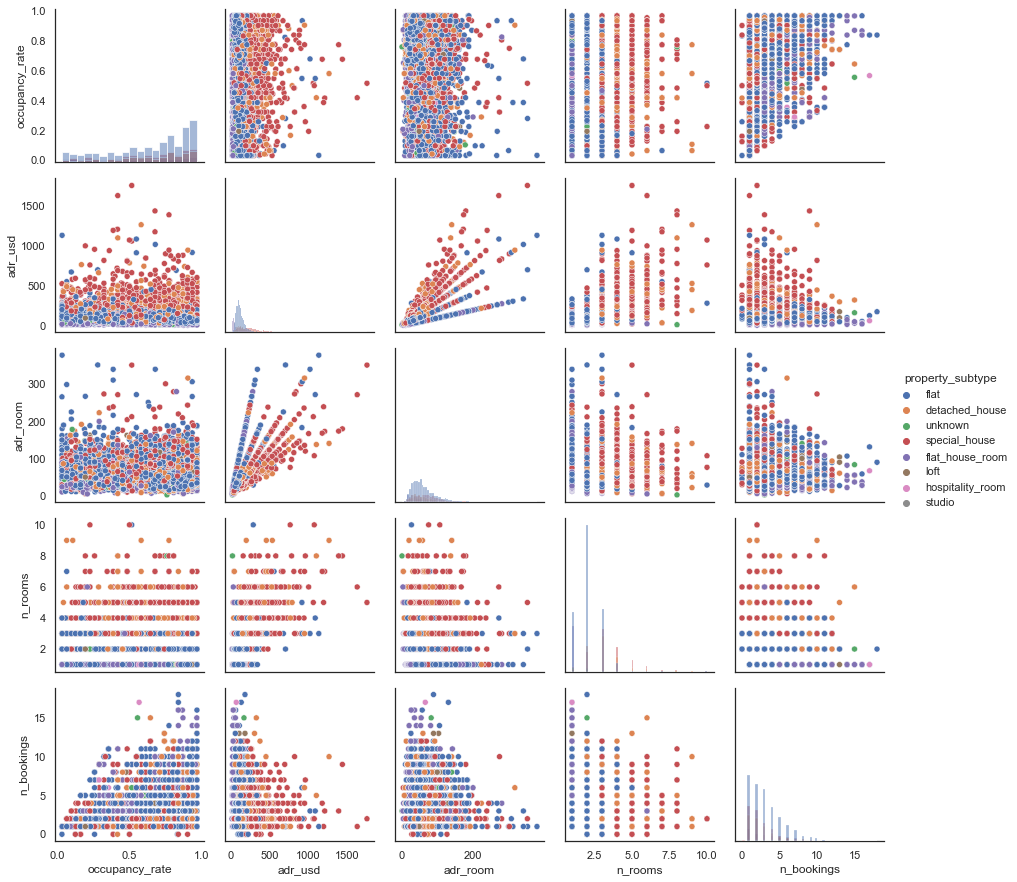

In [11]:
import seaborn as sns
sns.set_theme(style="white")

g = sns.PairGrid(df_0[cols].sample(5000), hue="property_subtype")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

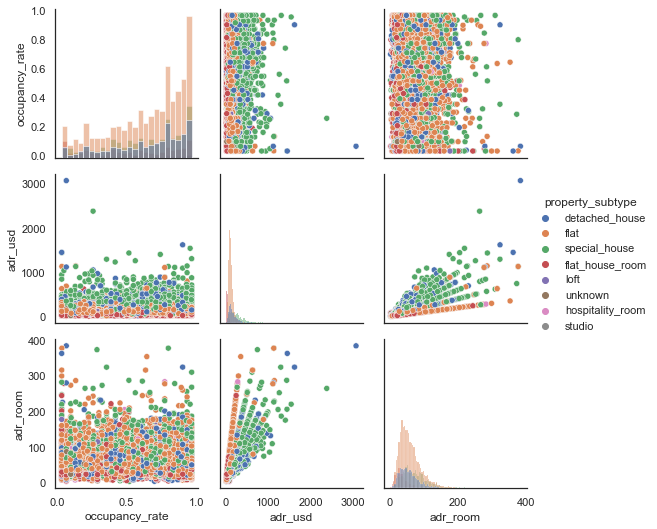

In [12]:
g = sns.PairGrid(df_0[['occupancy_rate', 'adr_usd', 'adr_room',  'property_subtype']].sample(10000), hue="property_subtype")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

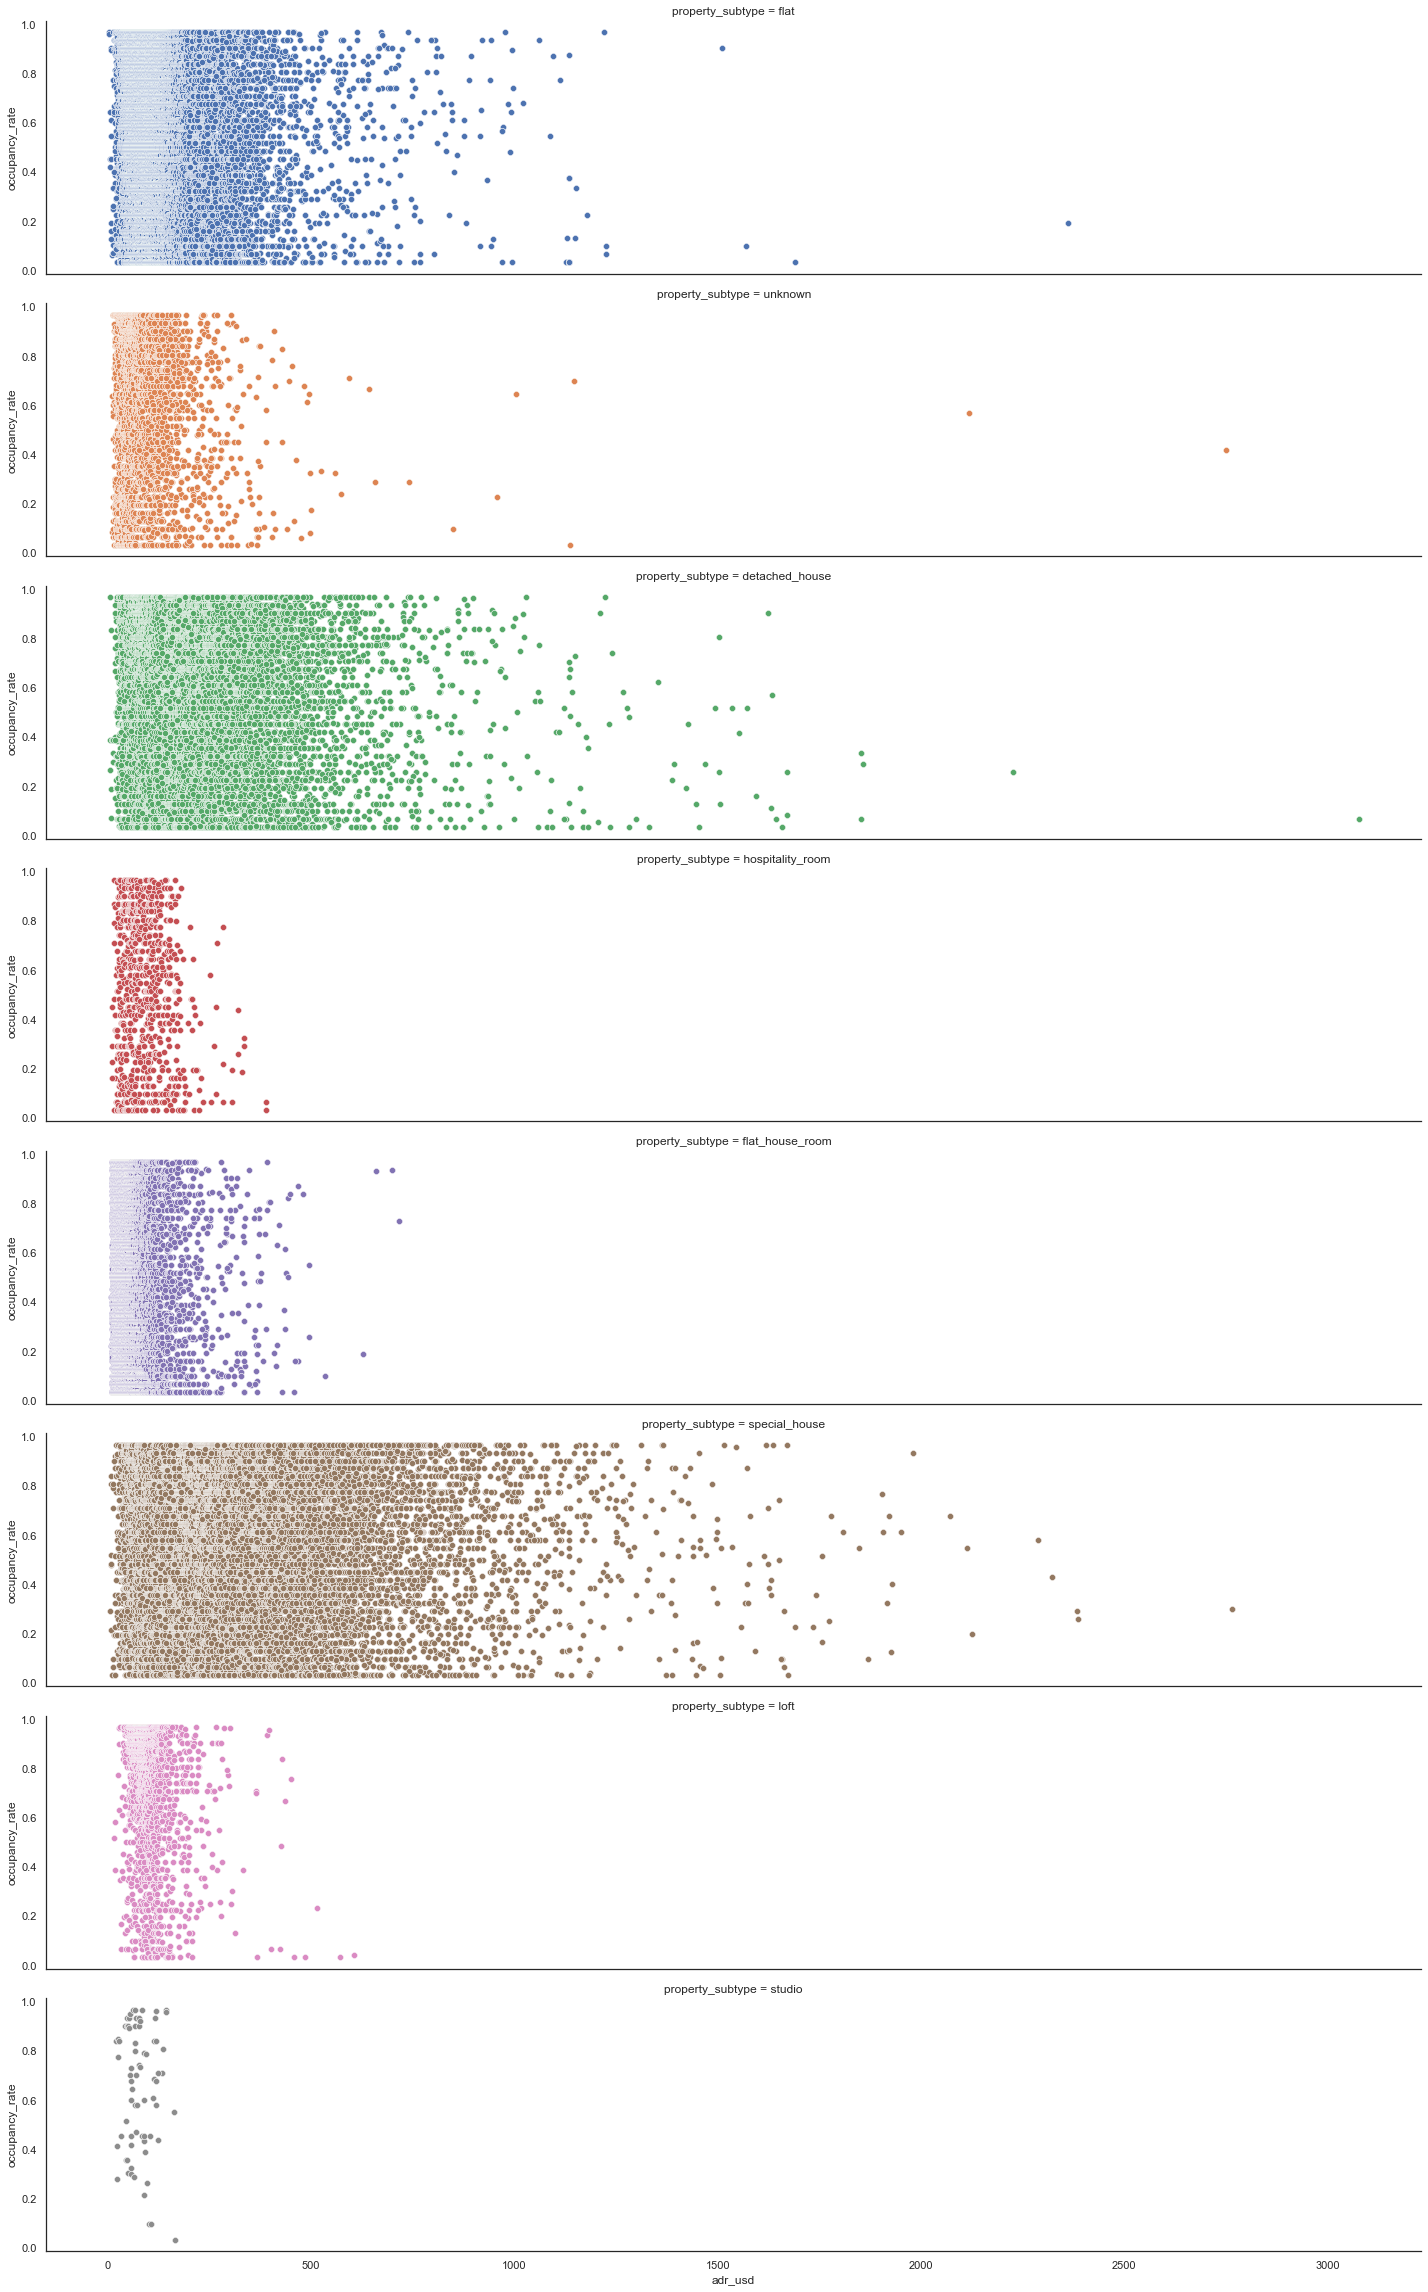

In [13]:
g = sns.FacetGrid(data = df_0, row="property_subtype", hue="property_subtype", height=4, aspect=5)
g.map(sns.scatterplot, 'adr_usd', 'occupancy_rate')


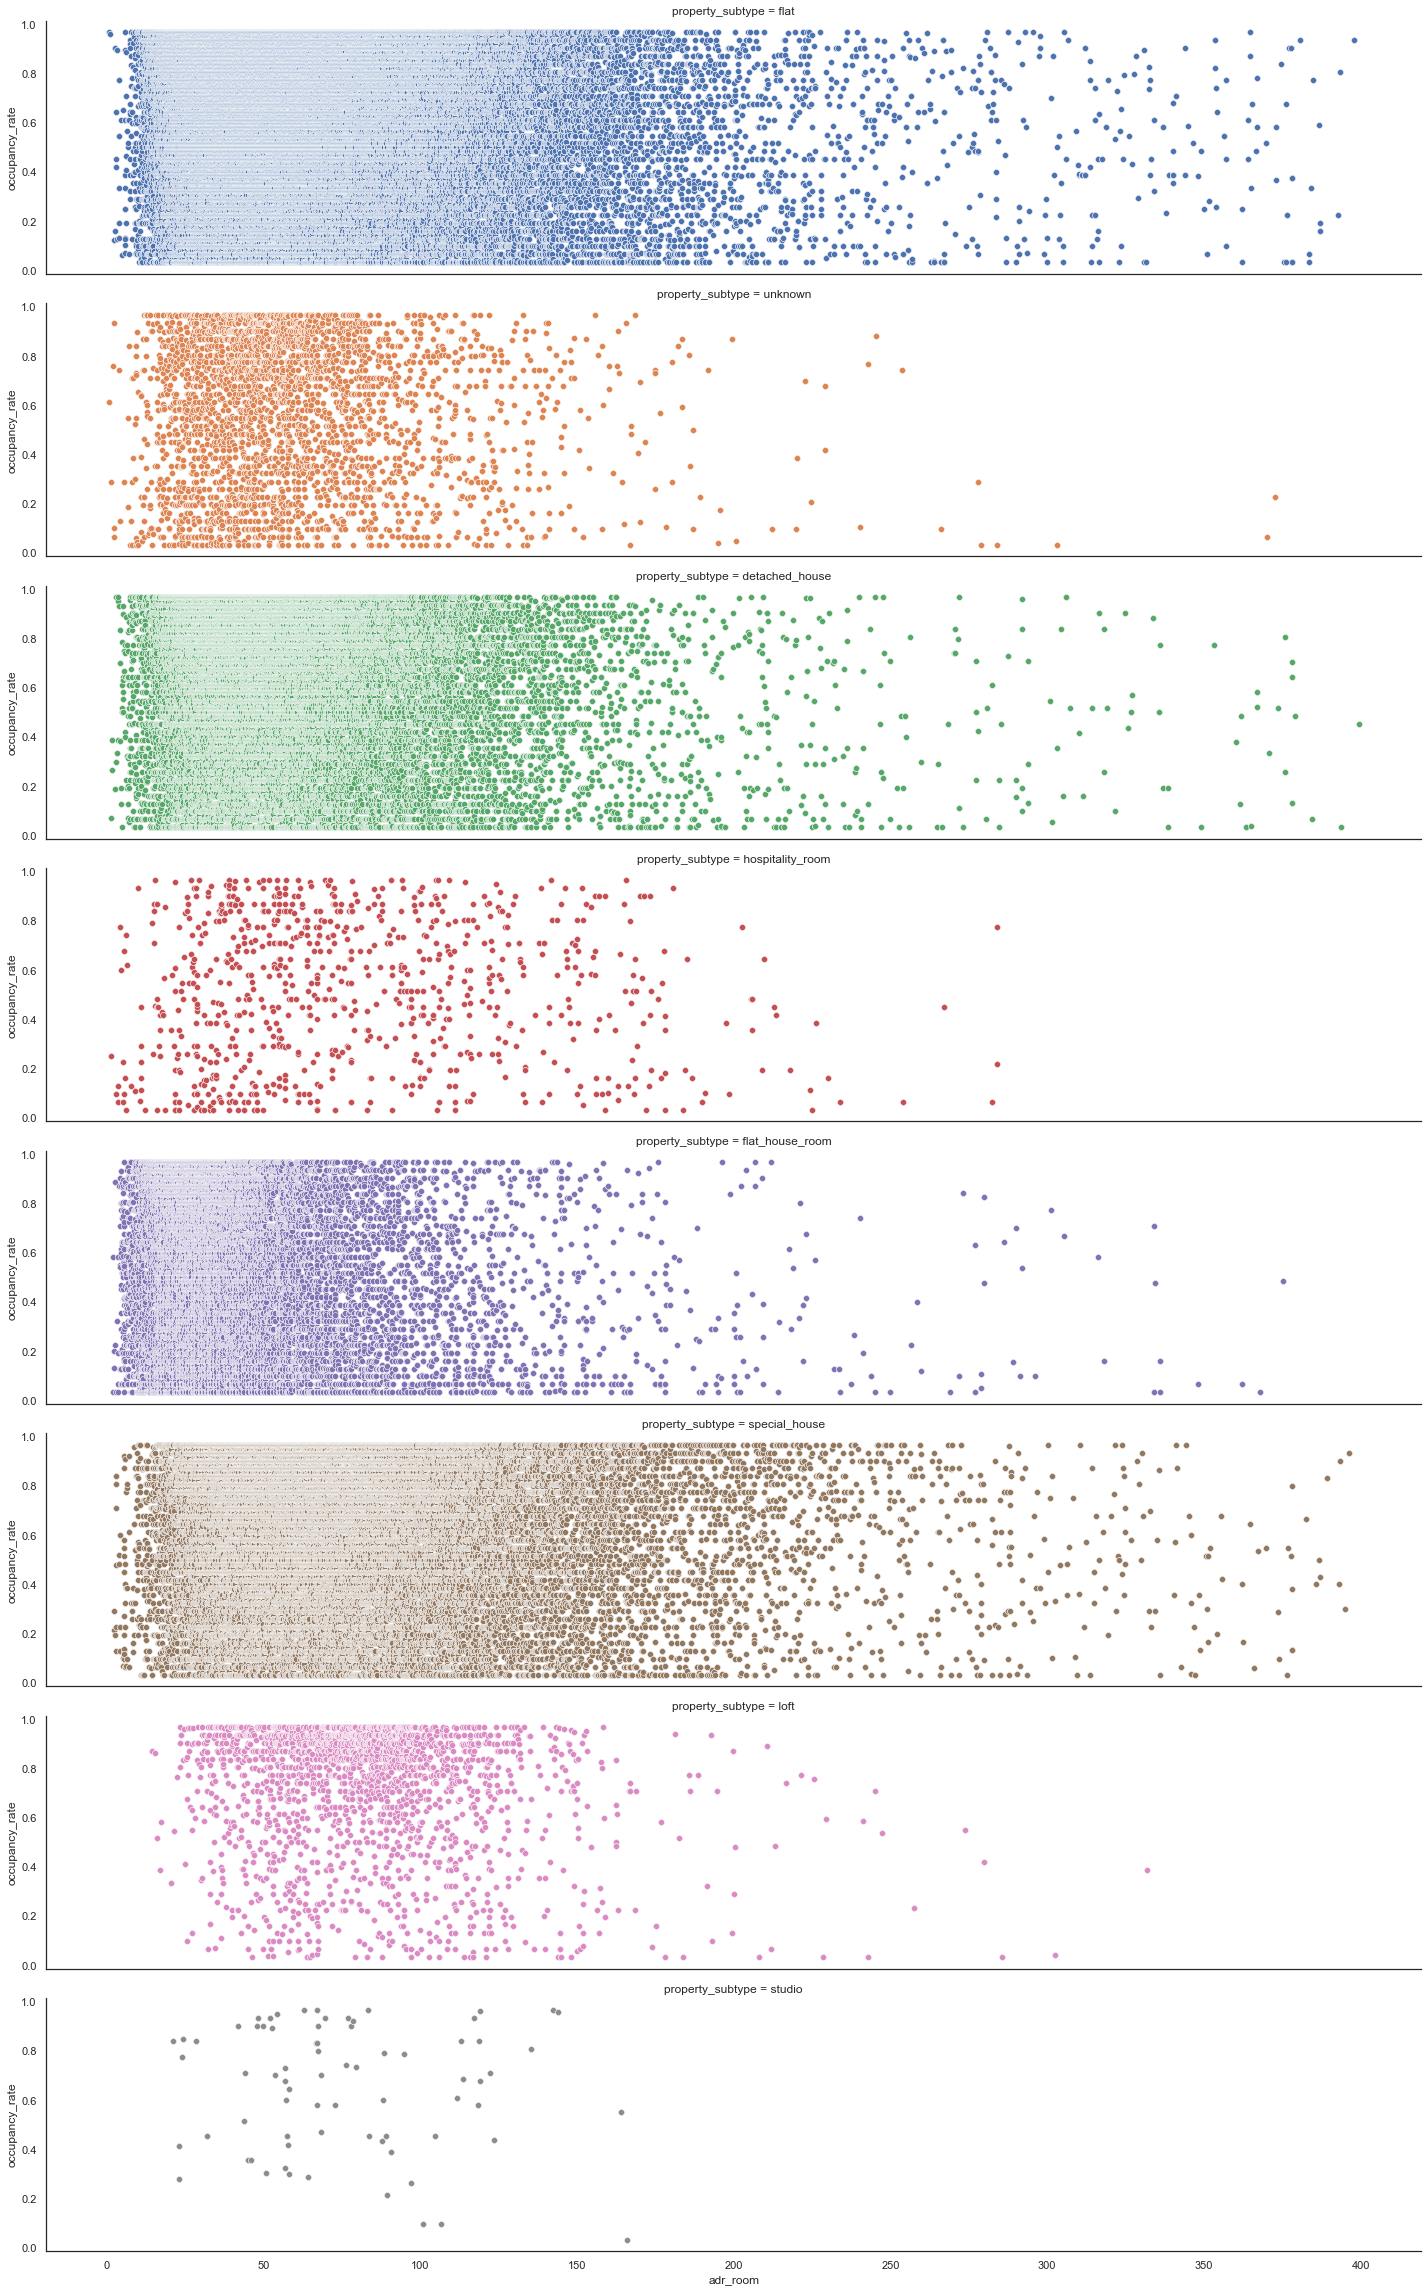

In [14]:
g = sns.FacetGrid(data = df_0, row="property_subtype", hue="property_subtype", height=4, aspect=5)
g.map(sns.scatterplot, 'adr_room', 'occupancy_rate')


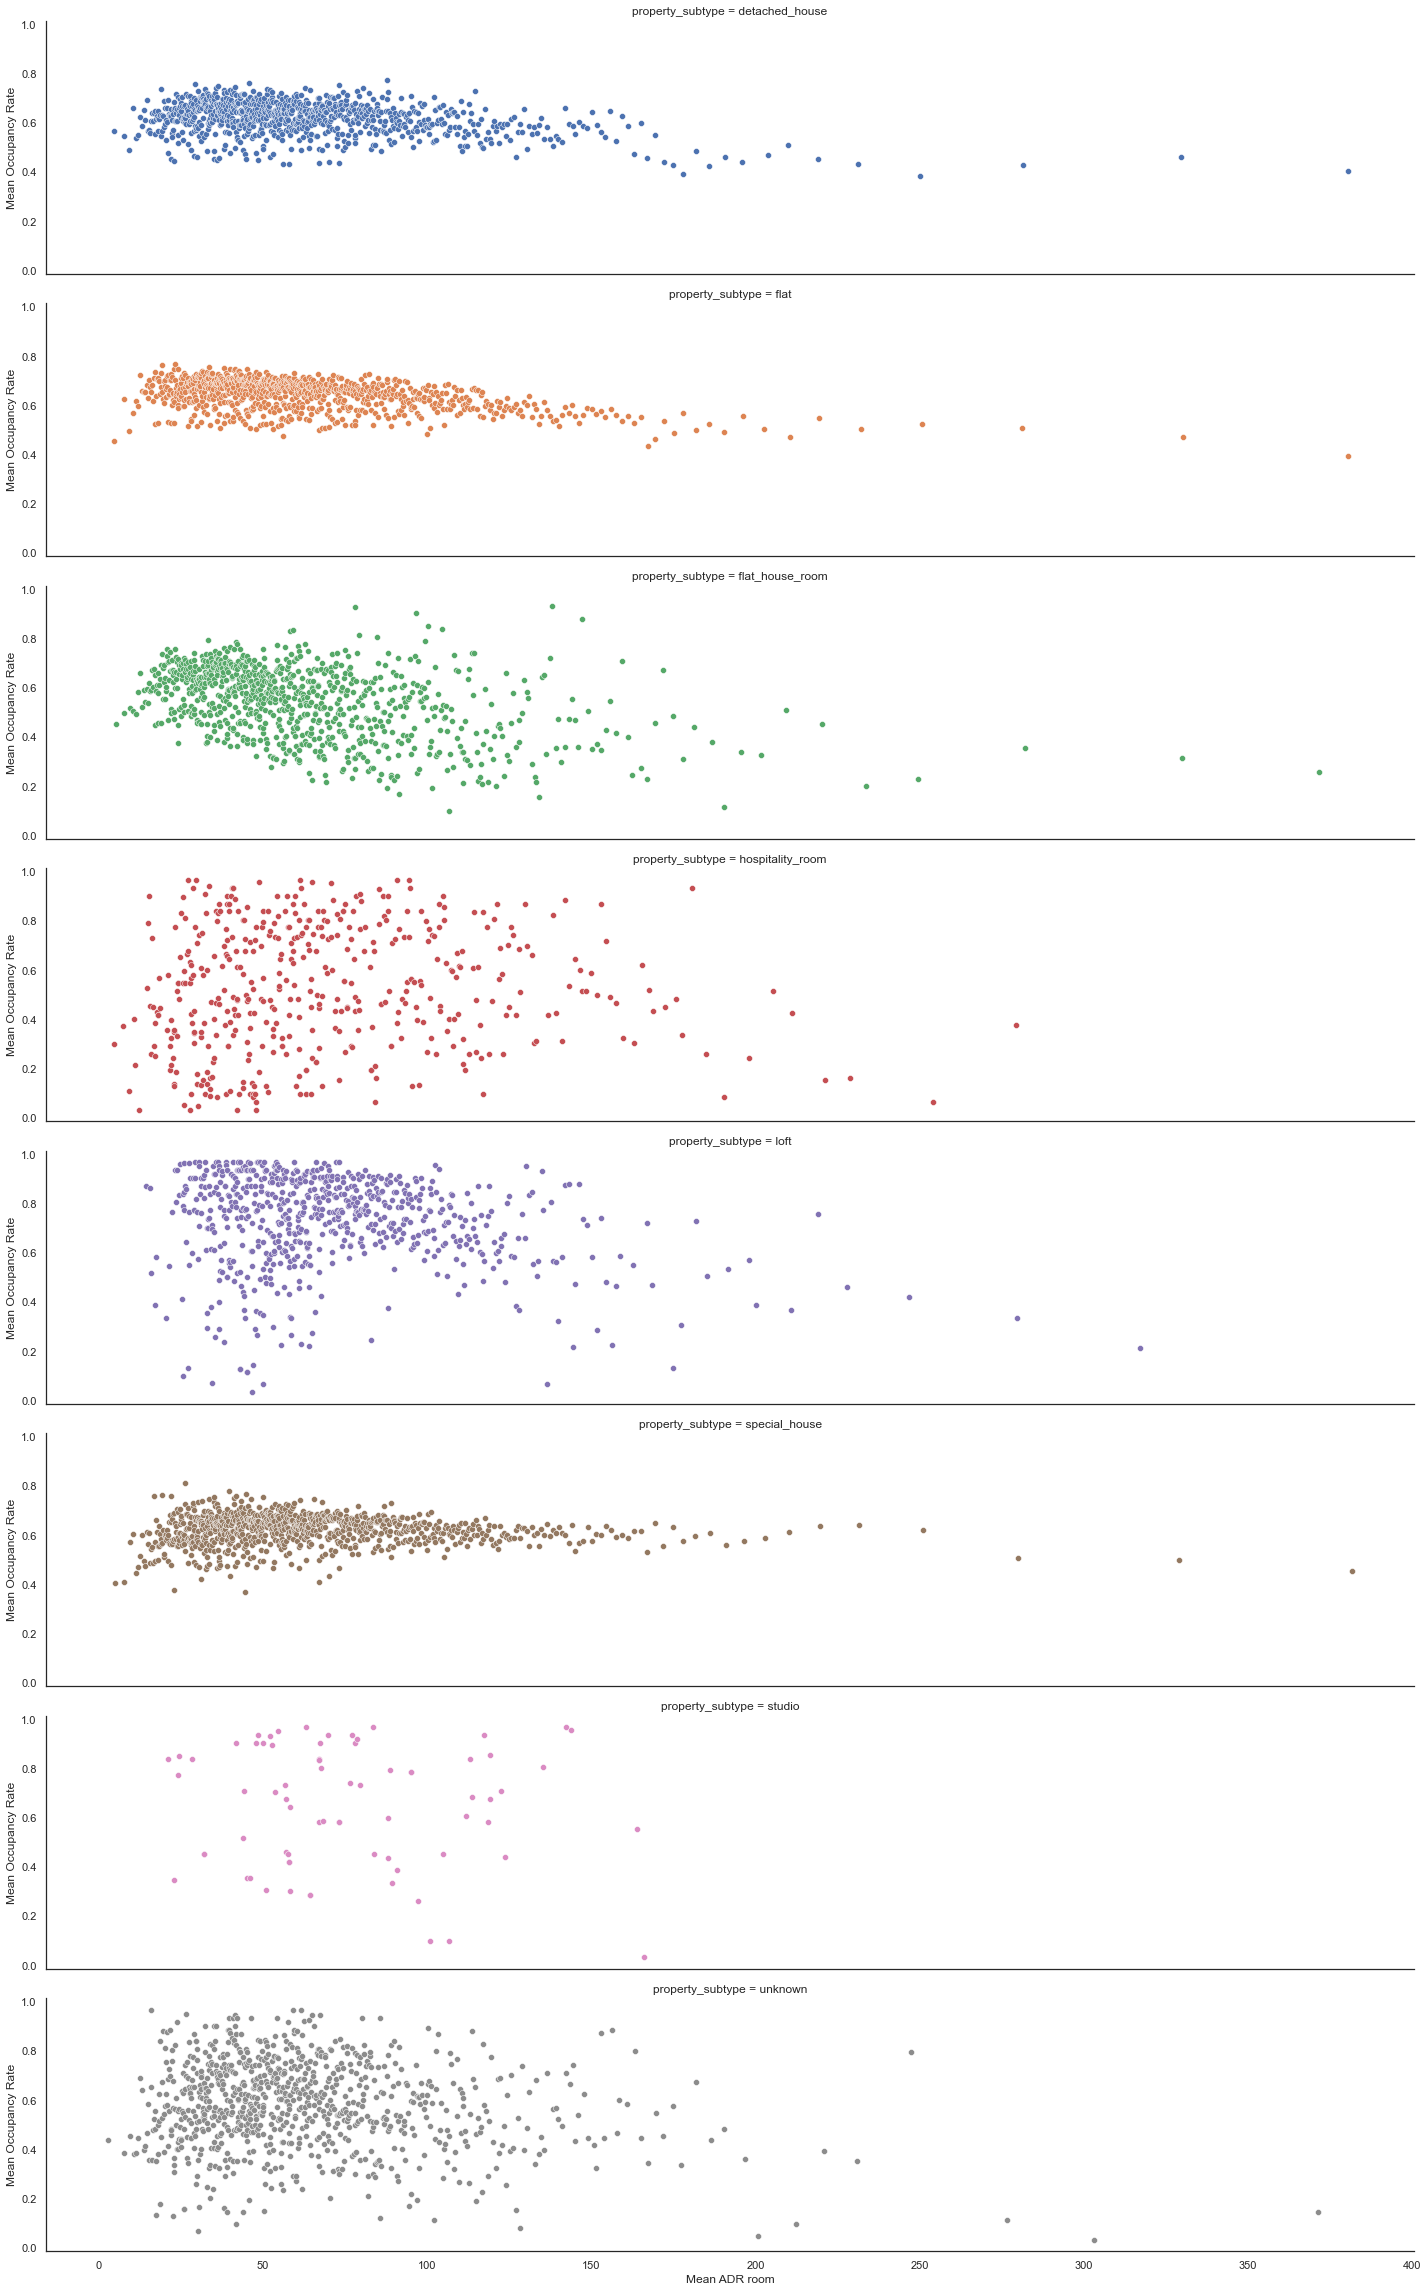

In [15]:
g = sns.FacetGrid(data = df_g2, row="property_subtype", hue="property_subtype", height=4, aspect=5)
g.map(sns.scatterplot, "Mean ADR room", "Mean Occupancy Rate", )

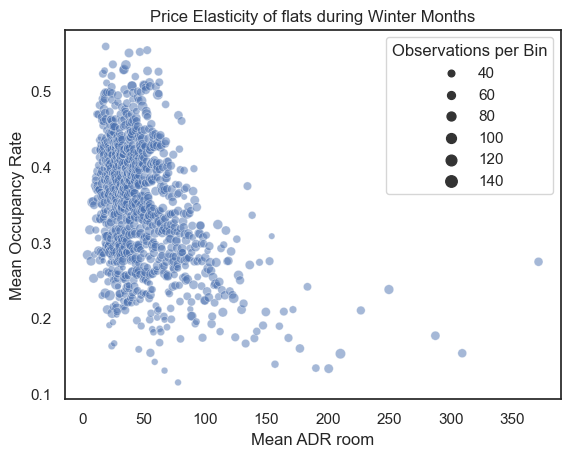

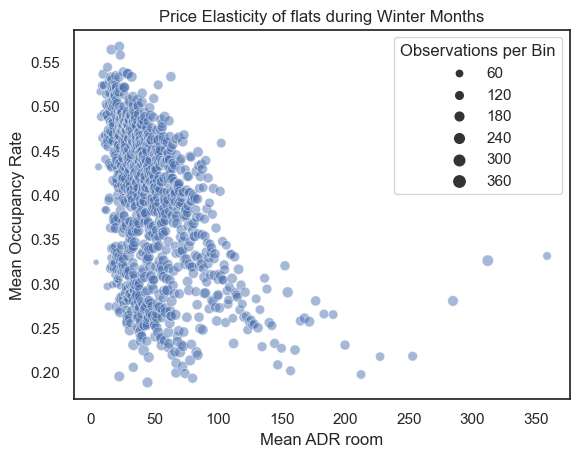

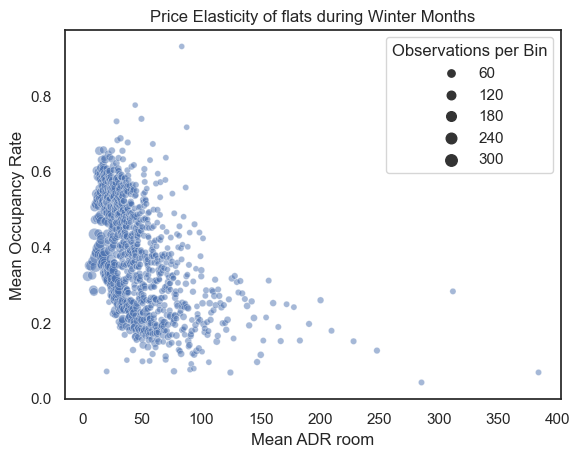

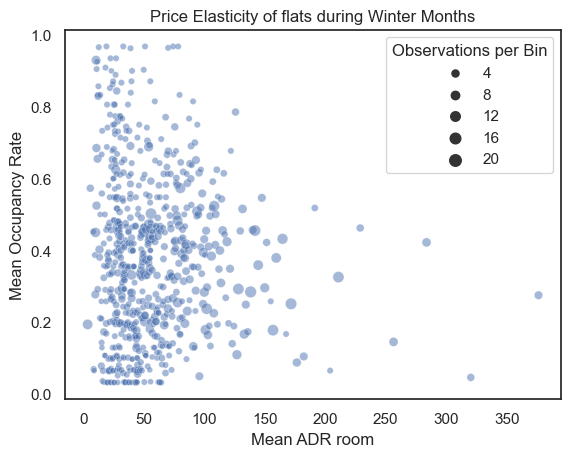

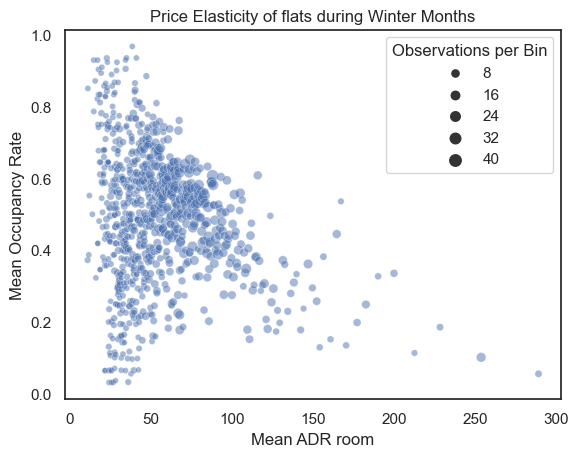

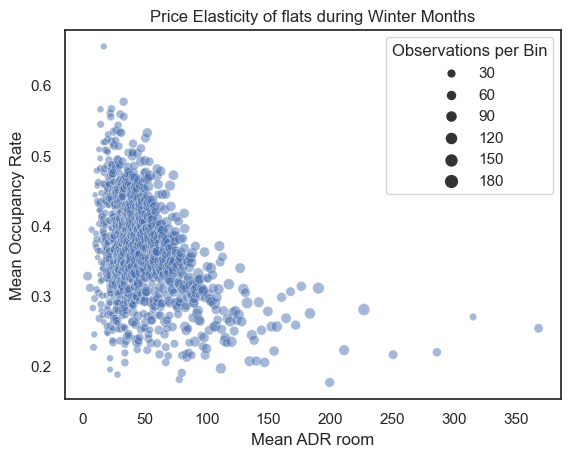

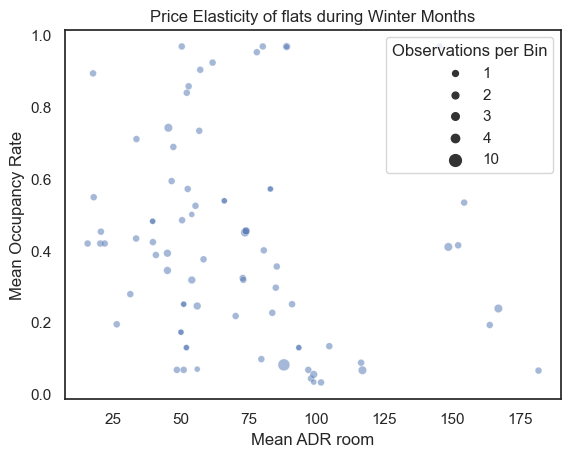

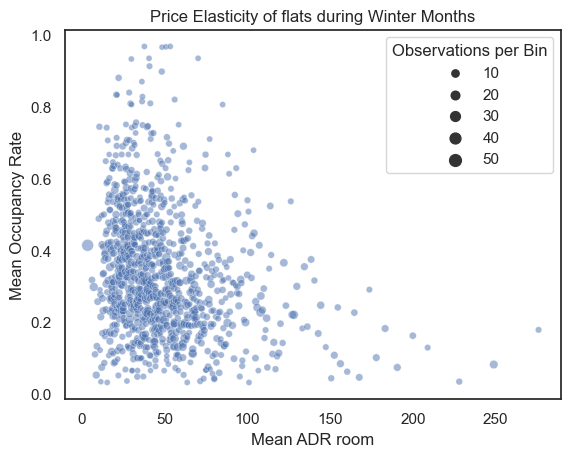

In [177]:
import matplotlib.pyplot as plt

for t in df_g2["property_subtype"].unique():
    df_aux = df_g2.loc[df_g2["property_subtype"]==t]
    plt.figure(t)
    sns.scatterplot(x="Mean ADR room", y="Mean Occupancy Rate", size="Observations per Bin",
            alpha=.5, palette="muted",data=df_aux ).set_title("Price Elasticity of flats during Winter Months")


ValueError: ' during summer months' is not a valid value for loc; supported values are 'left', 'center', 'right'

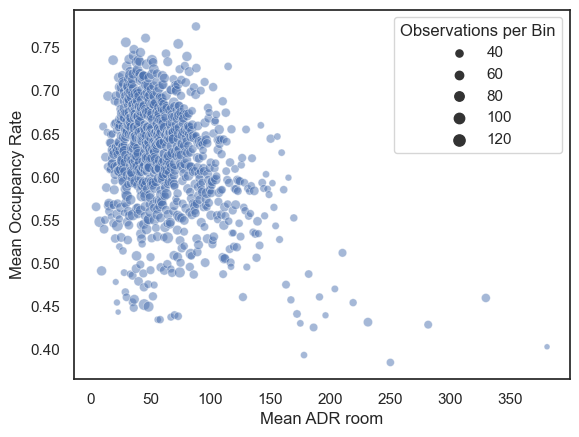

In [187]:
import matplotlib.pyplot as plt

for t in df_g2["property_subtype"].unique():
    df_aux = df_g2.loc[df_g2["property_subtype"]==t]
    plt.figure(t)
    sns.scatterplot(x="Mean ADR room", y="Mean Occupancy Rate", size="Observations per Bin",
            alpha=.5, palette="muted",data=df_aux ).set_title("Price Elasticity of ", t, " during summer months")


### 2.2. Escala Logarítmica

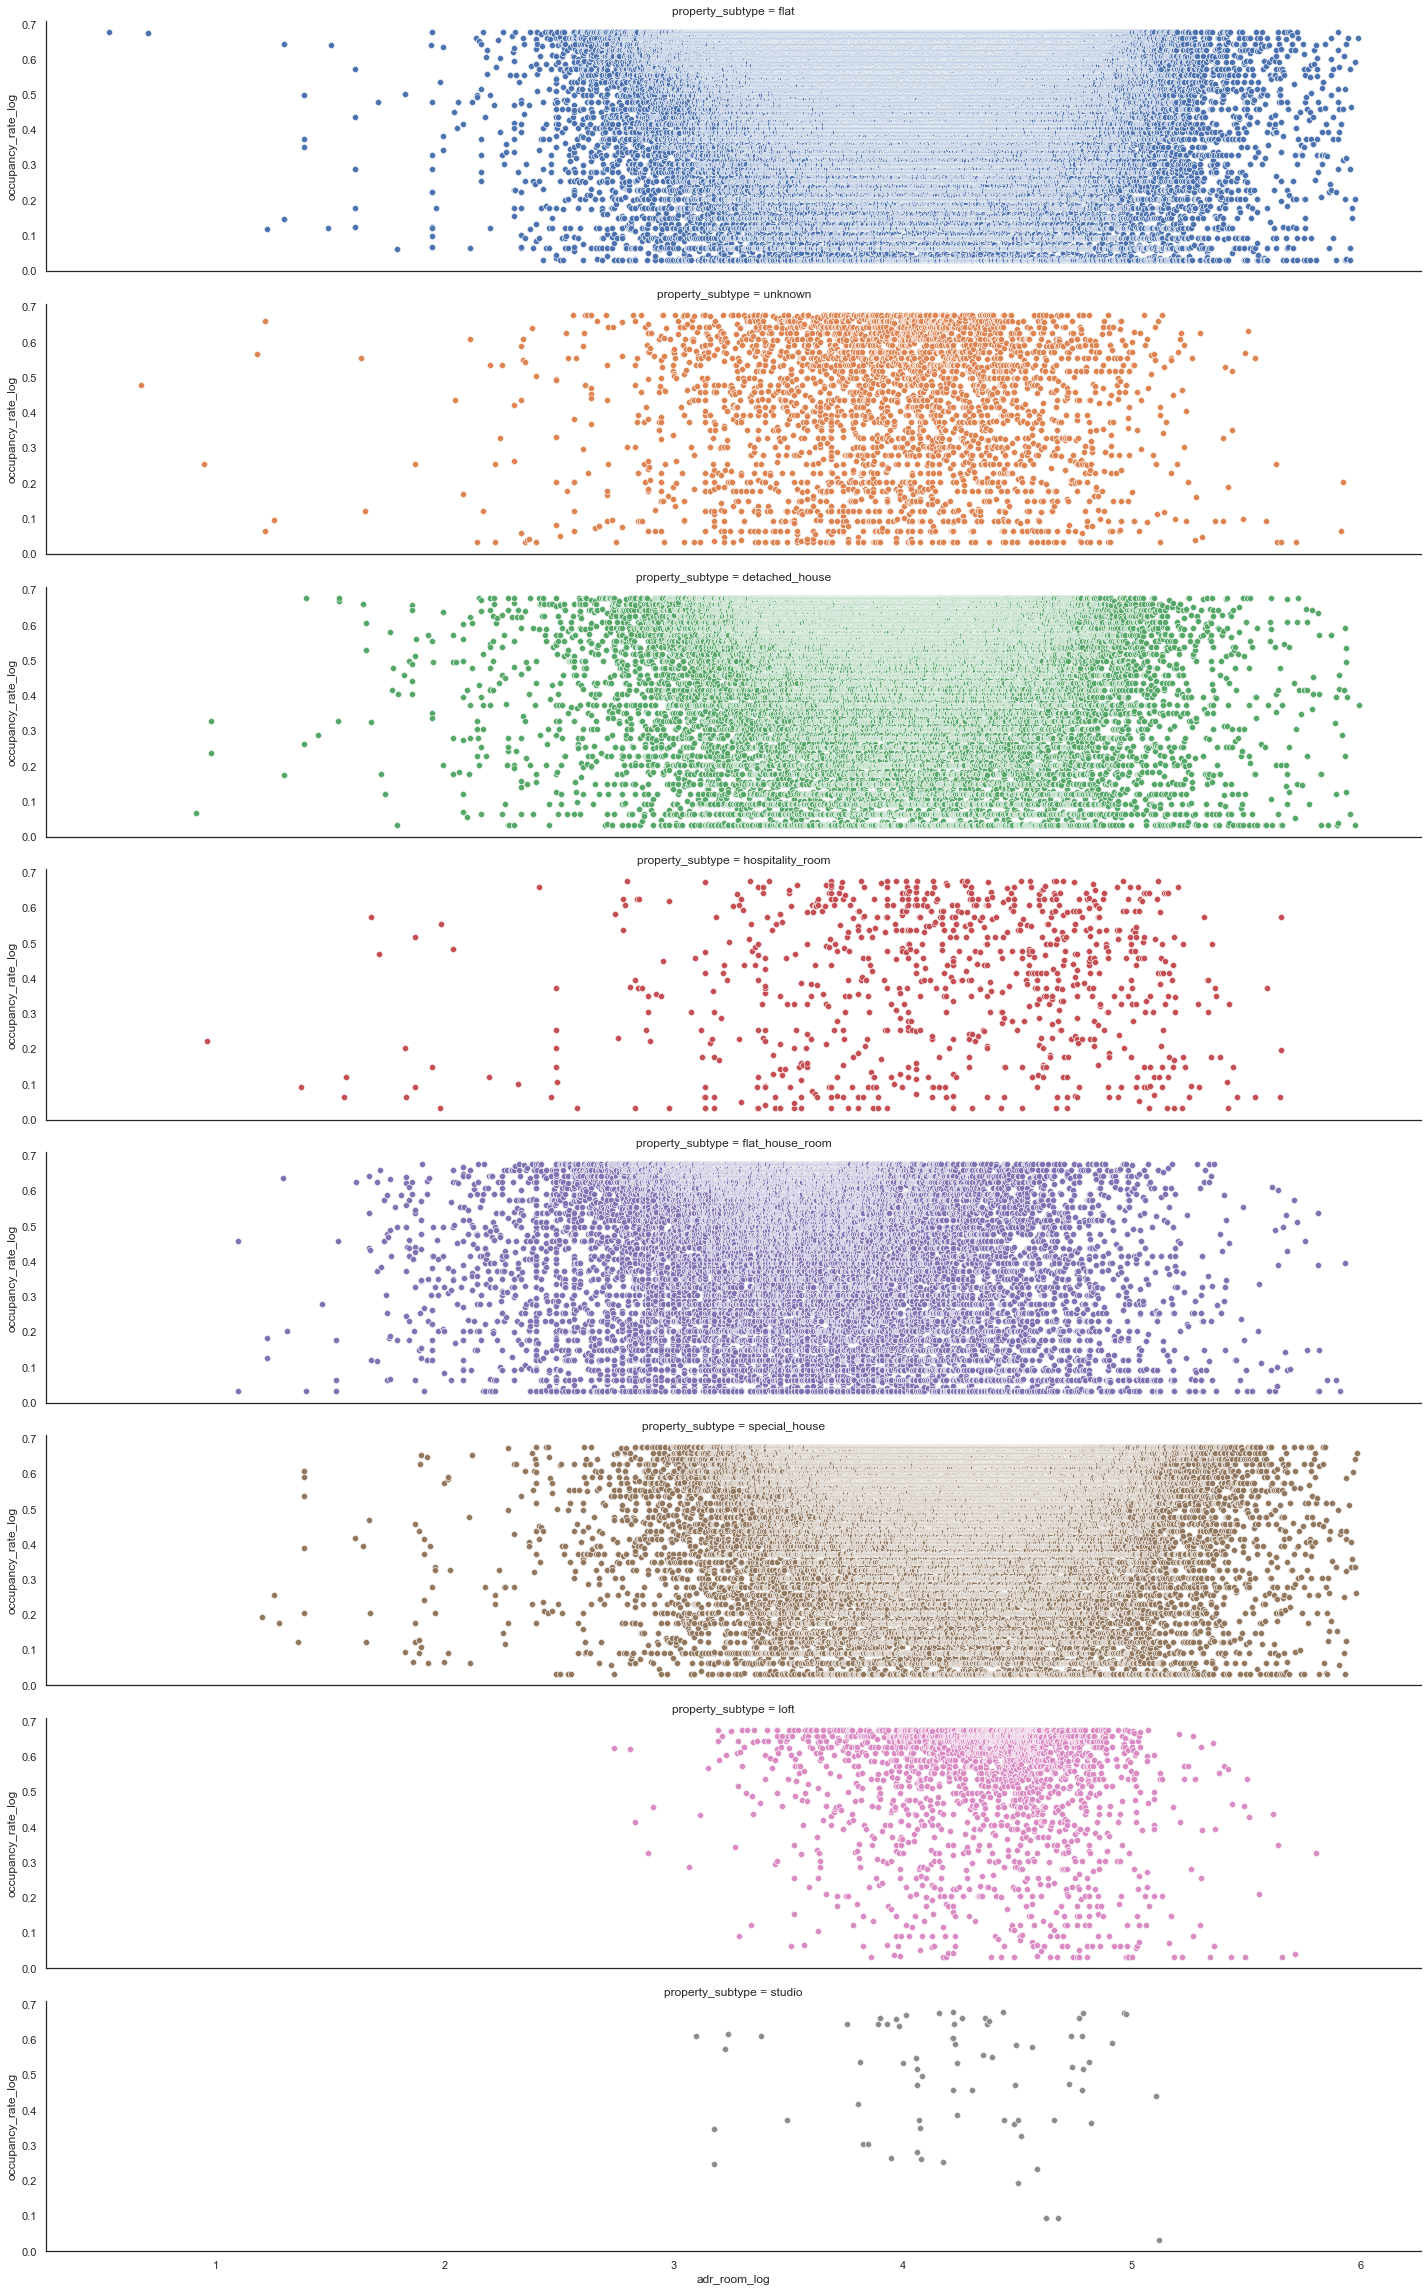

In [17]:
g = sns.FacetGrid(data = df_0, row="property_subtype", hue="property_subtype", height=4, aspect=5)
g.map(sns.scatterplot, 'adr_room_log', 'occupancy_rate_log')


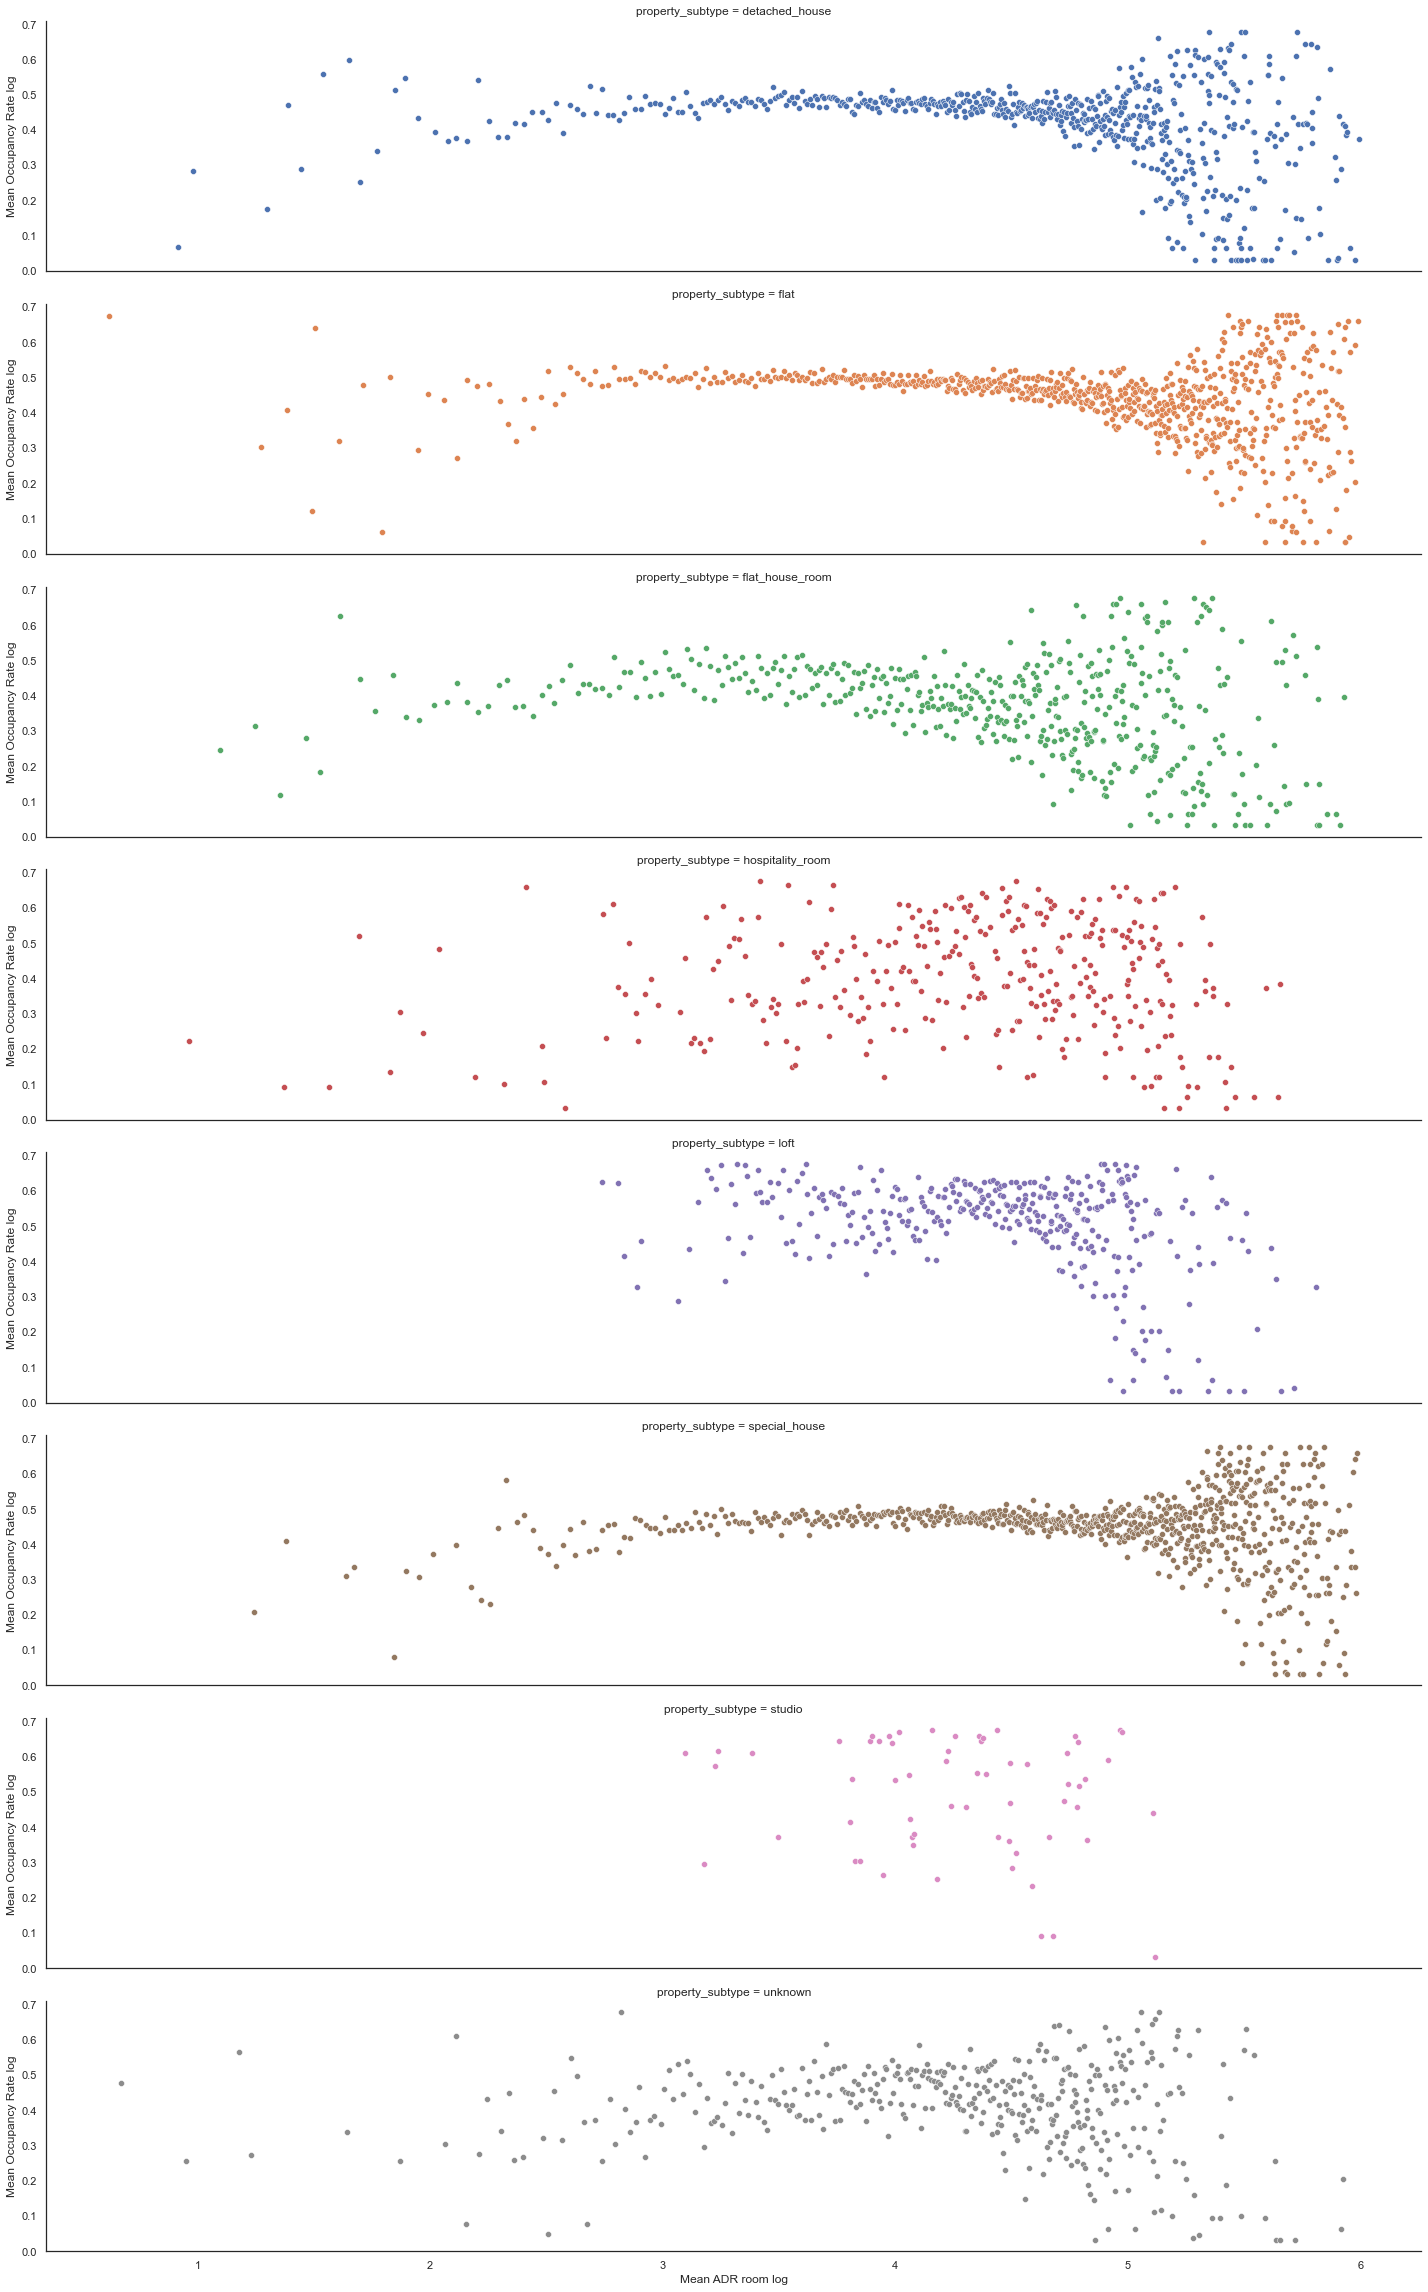

In [18]:
g = sns.FacetGrid(data = df_g, row="property_subtype", hue="property_subtype", height=4, aspect=5)
g.map(sns.scatterplot, "Mean ADR room log", "Mean Occupancy Rate log", )

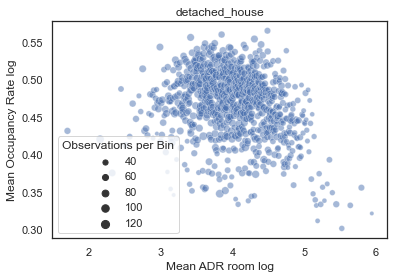

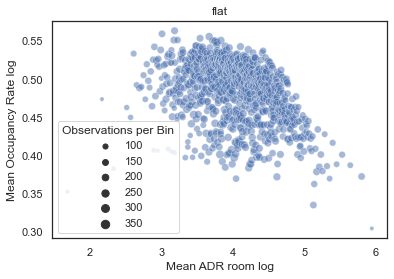

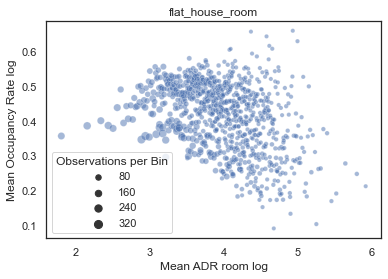

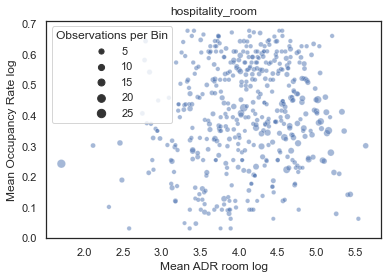

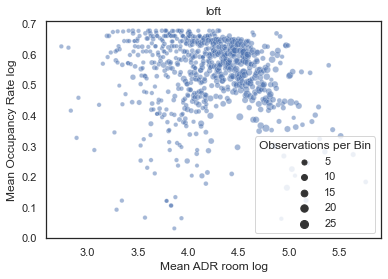

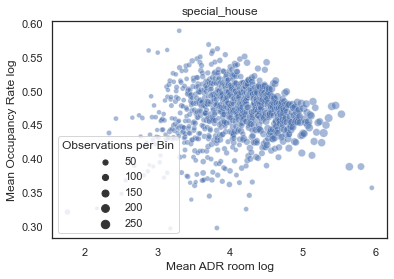

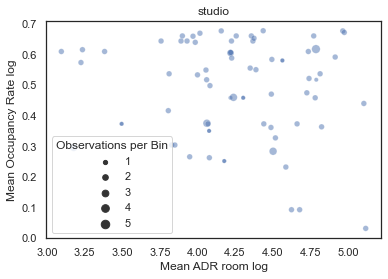

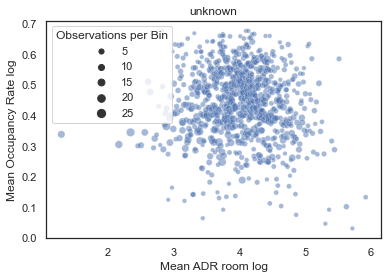

In [19]:
for t in df_g2["property_subtype"].unique():
    df_aux = df_g2.loc[df_g2["property_subtype"]==t]
    plt.figure(t)
    sns.scatterplot(x="Mean ADR room log", y="Mean Occupancy Rate log", size="Observations per Bin",
             alpha=.5, palette="muted",data=df_aux ).set_title(t)


## 3. MODELLING ELASTICITY

In [210]:
tipo_analizado ="flat_house_room"

df_aux = df_g2.loc[df_g2["property_subtype"]== tipo_analizado]
df_aux.columns

Index(['property_subtype', 'label1k', 'Mean ADR room', 'Mean Occupancy Rate',
       'Observations per Bin', 'Mean ADR room log', 'Mean Occupancy Rate log'],
      dtype='object')

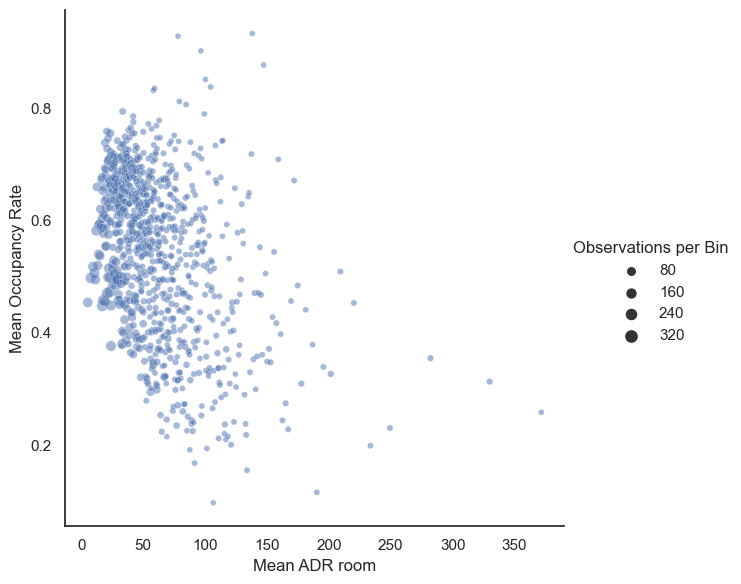

In [211]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Mean ADR room", y="Mean Occupancy Rate", size="Observations per Bin",
            alpha=.5, palette="muted",
            height=6, data=df_aux)

### 3.1. Escala natural

In [190]:
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV


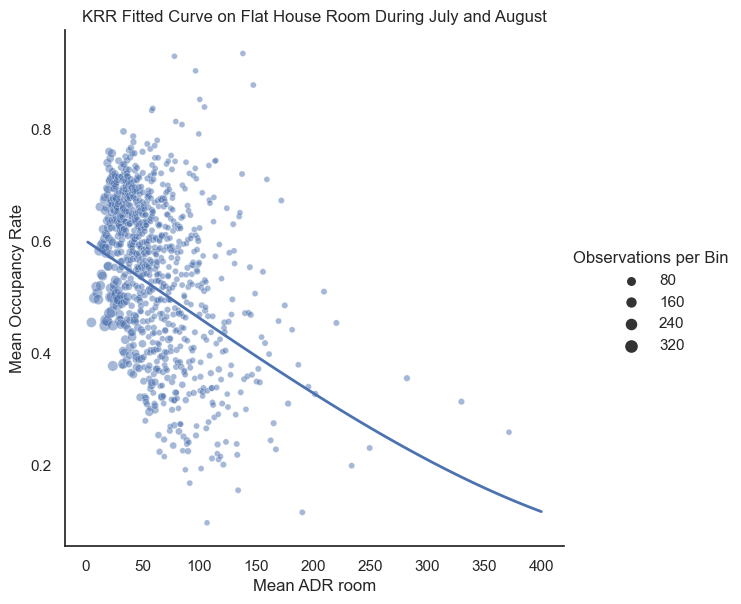

In [193]:
lb = 2
ub = 400

kr = GridSearchCV(KernelRidge(kernel="poly", degree=3), cv=10,
    param_grid={"alpha": [100, 10, 1, 0.1, 0.001], "gamma": np.logspace(-5, 10, 1)},
)

grid = np.r_[lb:ub:100j].reshape(-1,1)

#kr = KernelRidge(kernel="rbf", gamma=10, degree=3)
kr.fit(X=df_aux["Mean ADR room"].values.reshape(-1,1), y=df_aux["Mean Occupancy Rate"],
       sample_weight=df_aux["Observations per Bin"])

sns.relplot(x="Mean ADR room", y="Mean Occupancy Rate", size="Observations per Bin",
            alpha=.5, palette="muted",
            height=6, data=df_aux)
plt.plot(grid, kr.predict(grid), linewidth=2)
plt.title("KRR Fitted Curve on Flat House Room During July and August")

# Show the plot
plt.show()

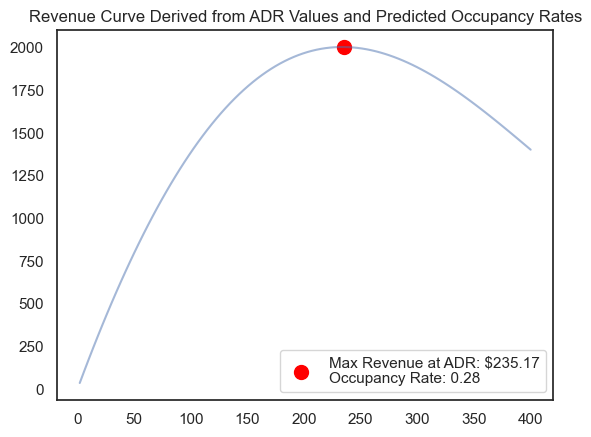

In [196]:
occupancy_rates = kr.predict(grid)
ingresos = grid.reshape(1, -1) * occupancy_rates * 30

# Find the maximum revenue and the corresponding ADR and occupancy rate
max_ingresos = max(ingresos[0])
x = grid.reshape(1, -1)[0]
best_price_index = ingresos[0].argmax()  # Get the index of the ADR value where revenue is maximized
best_price = x[best_price_index]  # ADR at maximum revenue
best_occupancy = occupancy_rates[best_price_index]  # Occupancy rate at maximum revenue

# Create the line plot
sns.lineplot(x=x, y=ingresos[0], alpha=0.5, palette="muted")

# Mark the maximization point
plt.scatter(best_price, max_ingresos, color='red', s=100, label=f'Max Revenue at ADR: ${best_price:.2f}\nOccupancy Rate: {best_occupancy:.2f}')

# Set the title of the plot
plt.title("Revenue Curve Derived from ADR Values and Predicted Occupancy Rates")

# Add legend to the plot to explain the marker
plt.legend()

# Show the plot
plt.show()

In [25]:
max_ingresos = max(ingresos[0])
x=grid.reshape(1,-1)[0]
best_price = x[ ingresos[0] >= max_ingresos ]
print("Solucion optima es: precio óptimo {} e ingreos maximos mes {}".format(best_price, max_ingresos))

Solucion optima es: precio óptimo [235.17171717] e ingreos maximos mes 2004.4906805275762


### 3.2. Escala logaritmica

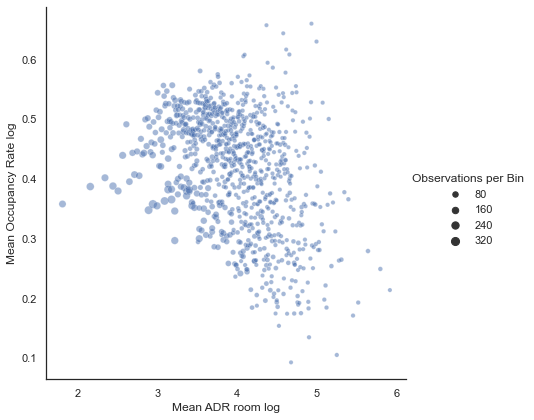

In [26]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Mean ADR room log", y="Mean Occupancy Rate log", size="Observations per Bin",
            alpha=.5, palette="muted",
            height=6, data=df_aux)

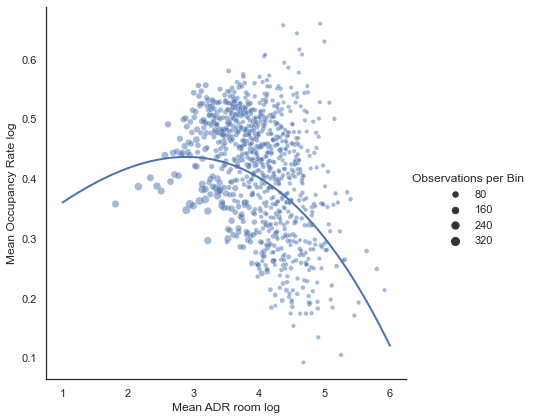

In [28]:
lb = 1
ub = 6

kr_l = GridSearchCV(KernelRidge(kernel="poly", degree=3), cv=5,
    param_grid={"alpha": [100, 10, 1, 0.1, 0.001], "gamma": np.logspace(-5, 10, 5)},
)

grid_l = np.r_[lb:ub:100j].reshape(-1,1)

#kr = KernelRidge(kernel="rbf", gamma=10, degree=3)
kr_l.fit(X=df_aux["Mean ADR room log"].values.reshape(-1,1), y=df_aux["Mean Occupancy Rate log"],
       sample_weight=df_aux["Observations per Bin"])

sns.relplot(x="Mean ADR room log", y="Mean Occupancy Rate log", size="Observations per Bin",
            alpha=.5, palette="muted",
            height=6, data=df_aux)
plt.plot(grid_l, kr_l.predict(grid_l),  linewidth=2)

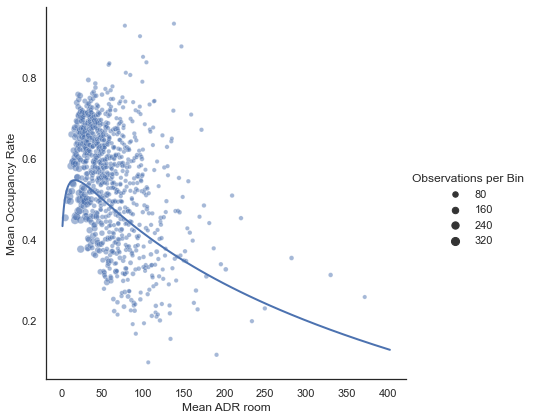

In [30]:
# ESCALA NATURAL
sns.relplot(x="Mean ADR room", y="Mean Occupancy Rate", size="Observations per Bin",
            alpha=.5, palette="muted",
            height=6, data=df_aux)
plt.plot(np.expm1(grid_l), np.expm1(kr_l.predict(grid_l)),  linewidth=2)

<AxesSubplot:>

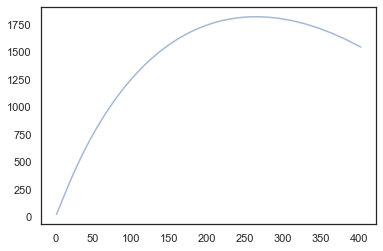

In [33]:
ingresos_l = np.expm1(grid_l.reshape(1,-1)) * np.expm1(kr_l.predict(grid_l))*30

sns.lineplot(x=np.expm1(grid_l.reshape(1,-1)[0]), y=ingresos_l[0], 
            sizes=(40, 400), alpha=.5, palette="muted")

In [35]:
max_ingresos = max(ingresos_l[0])
x=np.expm1(grid_l.reshape(1,-1)[0])
best_price = x[ ingresos_l[0] >= max_ingresos ]
print("Solucion optima es: precio óptimo {} e ingreos maximos mes {}".format(best_price, max_ingresos))

Solucion optima es: precio óptimo [268.33597984] e ingreos maximos mes 1821.8456371541895
